# Phase-averaged and phase-resolved spectroscopy

## Loading data and observation, setting pathes

1. Import the necessary packages.

In [1]:
import pandas as pd
import sys
sys.path.append('../../')
from nustar_scripts.nu_class import np, plt, os, glob, NustarObservation, scan_phase_resolved_products
from nustar_scripts.pulsar_init import Nu_path, ObsList
from nustar_scripts.nu_pyxspec import Model, Xset, AllModels,  AllModels, xspec,fit_spectra, scan_containers_ph_res,  plot_ph_res_storage

import matplotlib
%matplotlib inline
pd.set_option('display.max_columns', 500)

2. Set `ObsID` and `NustarObservation` object.

In [2]:
ObsID = ObsList[1] 
nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
ph_ave_folder = nu_obs.products_path+'/spe_and_lc'
ph_res_folder = nu_obs.products_path+'/phase_resolved'

###
Observation 90302319004 loaded successfully


3. Set xspec settings/models

In [3]:
model_name = 'relxilllp'  #set the model name
AllModels.lmod('relxill', '/Users/sdbykov/work/xray_pulsars/sj0243_nu/python_for_nustar/relxill_model/') #set path to relxill model
calc_errors = True #whether to calculate errors on spectral parameters.  useful to turn off when doing a quick fit.

AllModels.clear()
Xset.parallel.error = 22


## Phase-averaged spectra

1. Run cell below to set up an xspec model. Adjust its parameters to your needs and run `fit_spectra` function in the next cell.

The spectral results will be saved in the `xspec/{model name}/` folder in the `out{ObsID}/products/phase_resolved/` directory.

In [4]:
os.chdir(ph_ave_folder)

model = Model("constant*phabs*(bbodyrad+relxilllp)")
model.phabs.nH = '0.8 -1'

model.bbodyrad.kT = '1'
model.bbodyrad.norm = '1e3' # ,, 0.1, 0.2, 3, 4'

model.relxilllp.h = '5 -1'
model.relxilllp.a = '0 -1'
model.relxilllp.Incl = '10'
model.relxilllp.Incl.frozen = True
model.relxilllp.Rin = '70 0.1, 0, 0, 900, 900'
model.relxilllp.Rout = '=1.1*p8'
model.relxilllp.z = '0 -1'
model.relxilllp.gamma = '1.2  0.005 0.3 0.3 3 3'
model.relxilllp.logxi = '4'
model.relxilllp.Ecut = '20'
model.relxilllp.Ecut.frozen = False
model.relxilllp.refl_frac = '0.3'
model.relxilllp.fixReflFrac = '0'
model.relxilllp.Afe = '5 -1'



 *** loading RELXILL model (version 1.4.3) *** 


deleted xspec/relxilllp/*90302319004_relxilllp* and xspec/relxilllp/xcm/*90302319004_relxilllp* files
no storage found. fitting...
 loaded spe_and_lcA_sr.pi and spe_and_lcB_sr.pi from /Users/sdbykov/work/xray_pulsars/nustar_sj0243/nustar_products/out90302319004/products/spe_and_lc
fitting done
skipping errors for: []
    18     0.969423     0.972131    (-0.00135292,0.00135566)
     3      1.19639      1.21174    (-0.00781909,0.0075288)
     4      1246.31      1364.75    (-61.5884,56.8572)



*** Warning: User interrupted fit, fit not valid.


Errorr fail with 8
Errorr fail with 9
Errorr fail with 11
Errorr fail with 12
Errorr fail with 14
Errorr fail with 15
Errorr fail with 17
Fit done;  chi2 = 2513.555765903101 for 2308 dof, chi2_red = 1.0890622902526435, H0 prob = 0.001589819005
<Storage with 2 containers>
<Storage with 2 containers>


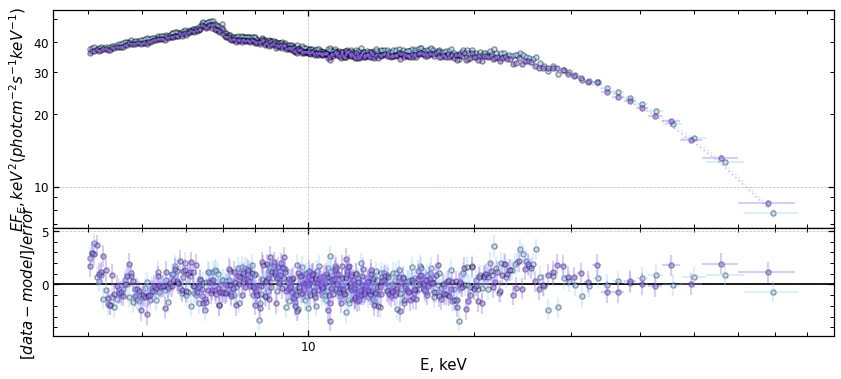

In [6]:

mo_fid_pars = fit_spectra(model = model, model_name = model_name, prefix = ObsID, dataset='spe_and_lc', rewrite = True, calc_errors = calc_errors)
print(mo_fid_pars)

## Phase-resolved spectra

1.  Set the model for the phase-resolved spectra in bins.  Usially it is the same model as for phase-averaged spectra, but with some parameters frozen.

In [7]:
os.chdir(ph_res_folder)

In [8]:
#try to restore the model for phase-average spectra
xspec.Xset.restore(f'{ph_ave_folder}/xspec/{model_name}/xcm/{ObsID}_{model_name}.xcm_model')

#free some of its parameters to phase-averaged values
model = AllModels(1)
model.bbodyrad.kT.frozen = True
model.bbodyrad.norm.frozen = True
model.relxilllp.logxi.frozen = True
model.relxilllp.Rin.frozen = True


 *** loading RELXILL model (version 1.4.3) *** 


2. Run the cell to iterate over phase bins and fit the spectra.

In [10]:
for binnum in range(1,3):
    print(f'##################### bin number {binnum} #####################')
    binnum = str(binnum)
    bb_pars = fit_spectra(model = model, model_name = model_name, prefix = f'{ObsID}_bin{binnum}', dataset=f'phase_resolved_bin{binnum}', rewrite = True, calc_errors=True)


[autoreload of nustar_scripts.nu_pyxspec failed: Traceback (most recent call last):
  File "/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/sdbykov/work/xray_pulsars/nustar_sj0243/data_

##################### bin number 1 #####################
deleted xspec/relxilllp/*90302319004_bin1_relxilllp* and xspec/relxilllp/xcm/*90302319004_bin1_relxilllp* files
no storage found. fitting...
 loaded phase_resolved_bin1A_sr.pi and phase_resolved_bin1B_sr.pi from /Users/sdbykov/work/xray_pulsars/nustar_sj0243/nustar_products/out90302319004/products/phase_resolved
fitting done
skipping errors for: None


TypeError: argument of type 'NoneType' is not iterable

## Plot  phase-resolved results

In [5]:
df_ph_res = scan_containers_ph_res(model_name)
df_ph_res

error_l  error_u  frozen      val
comp      par phase                                   
bbodyrad  kT  0.05       0.0      0.0     1.0  1.20421
              0.15       0.0      0.0     1.0  1.20421
              0.25       0.0      0.0     1.0  1.20421
              0.35       0.0      0.0     1.0  1.20421
              0.45       0.0      0.0     1.0  1.20421
...                      ...      ...     ...      ...
relxilllp z   0.55       0.0      0.0     1.0  0.00000
              0.65       0.0      0.0     1.0  0.00000
              0.75       0.0      0.0     1.0  0.00000
              0.85       0.0      0.0     1.0  0.00000
              0.95       0.0      0.0     1.0  0.00000

[160 rows x 4 columns]

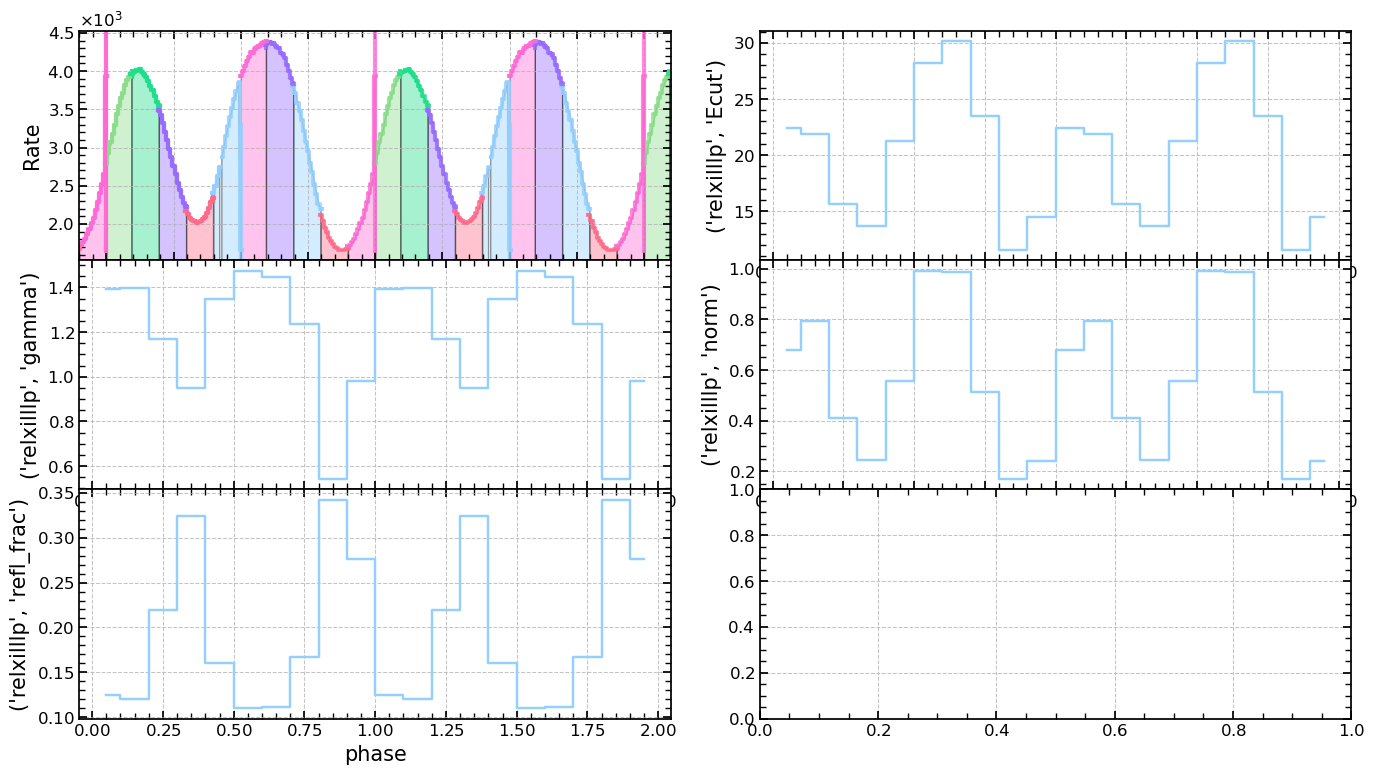

In [499]:
os.chdir(ph_res_folder)
plot_ph_res_storage(df_ph_res, nu_obs, 'phase_resolved');
